# **Inżynieria wiedzy i systemy ekspertowe.**

Data oddania projektu: **24.11.2024 r.**

Numer grupy projektowej: **1**

Imię i nazwisko: **Weronika Bednarz**

Temat projektu: **System rozmytej oceny nastroju utworów muzycznych na podstawie ich charakterystyk akustycznych.**

Zaimportowane biblioteki

In [ ]:
import numpy as np
import pandas as pd
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files
from ipywidgets import widgets, VBox, Output, HBox
from IPython.display import display
from mpl_toolkits.mplot3d import Axes3D

In [ ]:
!pip install -U scikit-fuzzy
!pip install networkx

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 920.8/920.8 kB 8.5 MB/s eta 0:00:00


In [ ]:
import skfuzzy as fuzz
from skfuzzy import control as ctrl

In [ ]:
%matplotlib inline

Załadowanie oraz wyświetlenie danych

In [ ]:
uploadedFile = files.upload()

Saving dataset.csv to dataset.csv


In [ ]:
data = pd.read_csv('dataset.csv')

In [ ]:
data

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,4,acoustic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113995,113995,2C3TZjDRiAzdyViavDJ217,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Sleep My Little Boy,21,384999,False,0.172,0.2350,...,-16.393,1,0.0422,0.6400,0.928000,0.0863,0.0339,125.995,5,world-music
113996,113996,1hIz5L4IB9hN3WRYPOCGPw,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Water Into Light,22,385000,False,0.174,0.1170,...,-18.318,0,0.0401,0.9940,0.976000,0.1050,0.0350,85.239,4,world-music
113997,113997,6x8ZfSoqDjuNa5SVP5QjvX,Cesária Evora,Best Of,Miss Perfumado,22,271466,False,0.629,0.3290,...,-10.895,0,0.0420,0.8670,0.000000,0.0839,0.7430,132.378,4,world-music
113998,113998,2e6sXL2bYv4bSz6VTdnfLs,Michael W. Smith,Change Your World,Friends,41,283893,False,0.587,0.5060,...,-10.889,1,0.0297,0.3810,0.000000,0.2700,0.4130,135.960,4,world-music


Obróbka danych

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        114000 non-null  int64  
 1   track_id          114000 non-null  object 
 2   artists           113999 non-null  object 
 3   album_name        113999 non-null  object 
 4   track_name        113999 non-null  object 
 5   popularity        114000 non-null  int64  
 6   duration_ms       114000 non-null  int64  
 7   explicit          114000 non-null  bool   
 8   danceability      114000 non-null  float64
 9   energy            114000 non-null  float64
 10  key               114000 non-null  int64  
 11  loudness          114000 non-null  float64
 12  mode              114000 non-null  int64  
 13  speechiness       114000 non-null  float64
 14  acousticness      114000 non-null  float64
 15  instrumentalness  114000 non-null  float64
 16  liveness          11

In [ ]:
unused_columns = ['track_id', 'album_name', 'popularity', 'duration_ms', 'explicit', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
                  'tempo', 'time_signature', 'track_genre']

data.drop(columns=unused_columns, inplace=True)

In [ ]:
data.columns

Index(['Unnamed: 0', 'artists', 'track_name', 'danceability', 'energy',
       'valence'],
      dtype='object')

In [ ]:
data.isnull().sum()

,0
Unnamed: 0,0
artists,1
track_name,1
danceability,0
energy,0
valence,0


In [ ]:
data.dropna(inplace=True)

In [ ]:
data.duplicated().sum()

0

In [ ]:
data.duplicated(subset=['artists', 'track_name']).sum()

32656

In [ ]:
data = data.drop_duplicates(subset=['artists', 'track_name'])

<Figure size 1800x1200 with 0 Axes>

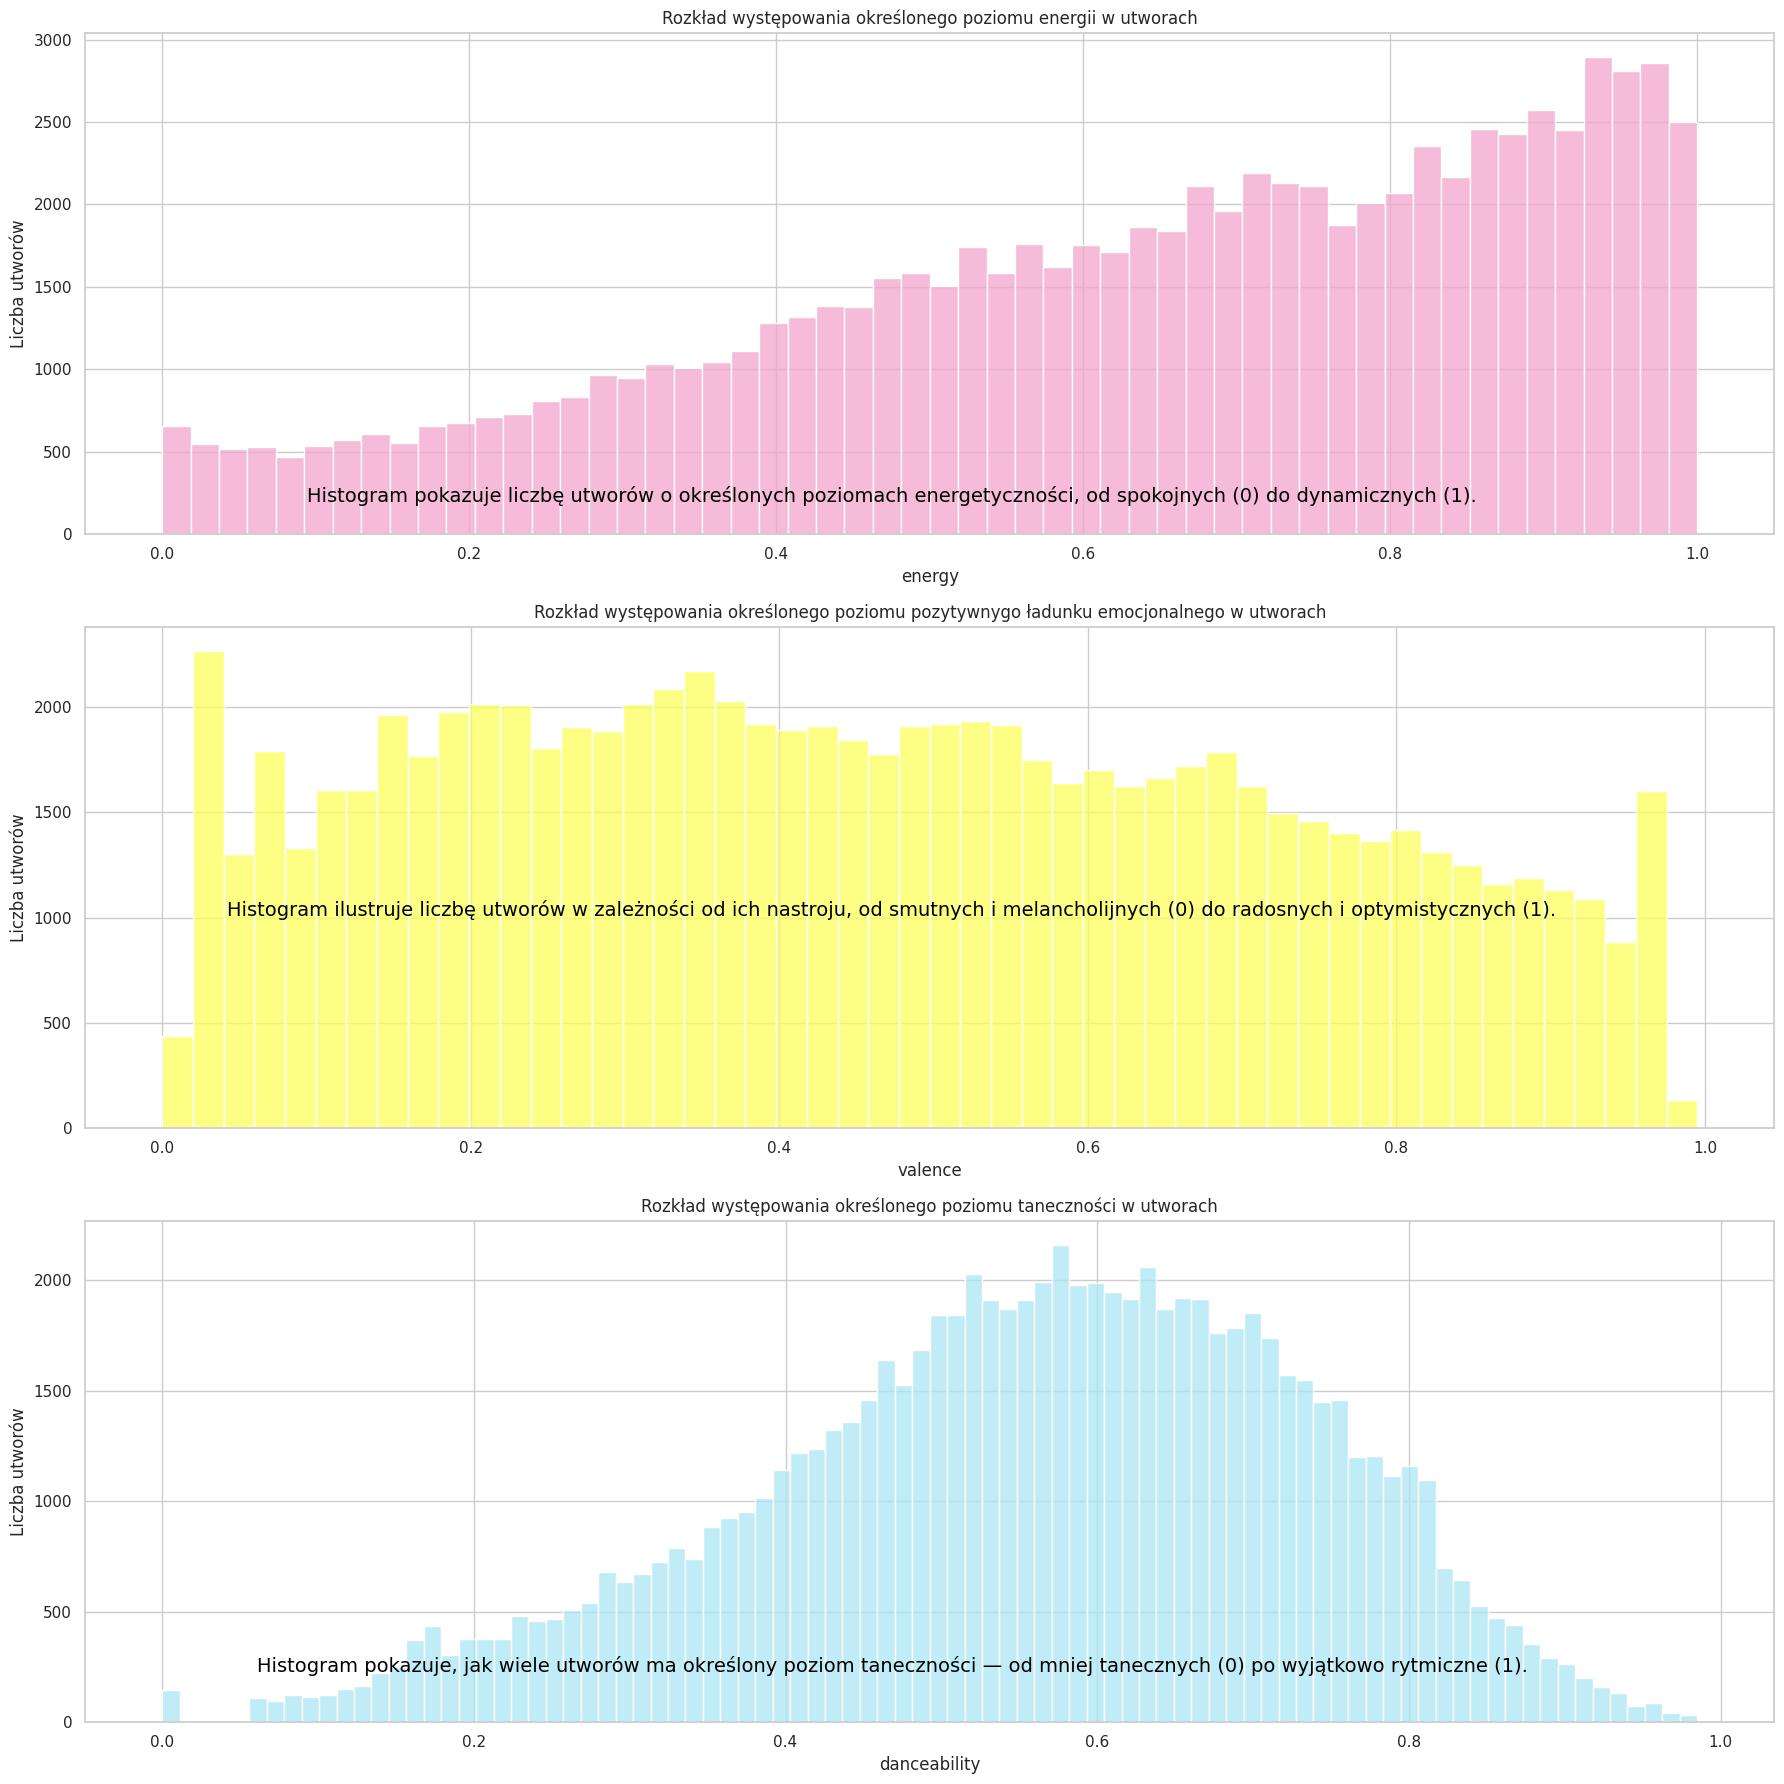

In [ ]:
sns.set(style="whitegrid")
plt.figure(figsize=(18, 12))

fig, axes = plt.subplots(3, 1, figsize=(18, 18))

# Tworzy histogramy rozkładu zmiennych z krzywą KDE
sns.histplot(data['energy'], kde=False, color=(242/255, 165/255, 203/255), ax=axes[0])
axes[0].set_title('Rozkład występowania określonego poziomu energii w utworach')
axes[0].set_ylabel('Liczba utworów')

fig.text(0.5, 0.72, 'Histogram pokazuje liczbę utworów o określonych poziomach energetyczności, od spokojnych (0) do dynamicznych (1).',
         ha='center', va='center', fontsize=14, color='black')

sns.histplot(data['valence'], kde=False, color=(252/255, 255/255, 89/255), ax=axes[1])
axes[1].set_title('Rozkład występowania określonego poziomu pozytywnygo ładunku emocjonalnego w utworach')
axes[1].set_ylabel('Liczba utworów')

fig.text(0.5, 0.49, 'Histogram ilustruje liczbę utworów w zależności od ich nastroju, od smutnych i melancholijnych (0) do radosnych i optymistycznych (1).',
         ha='center', va='center', fontsize=14, color='black')

sns.histplot(data['danceability'], kde=False, color=(171/255, 230/255, 245/255), ax=axes[2])
axes[2].set_title('Rozkład występowania określonego poziomu taneczności w utworach')
axes[2].set_ylabel('Liczba utworów')

fig.text(0.5, 0.07, 'Histogram pokazuje, jak wiele utworów ma określony poziom taneczności — od mniej tanecznych (0) po wyjątkowo rytmiczne (1).',
         ha='center', va='center', fontsize=14, color='black')

# Dopasowanie układu
plt.tight_layout()
plt.show()

Oś X przedstawia rozkład wartości danego hiperparametru dla utworów z bazy danych.

Oś Y reprezentuje liczbę utworów.

Krzywa KDE przedstawia wygładzony trend w rozkładzie wartości.

In [ ]:
min_max_values = data[['energy', 'valence', 'danceability']].agg(['min', 'max'])
print(min_max_values)

     energy  valence  danceability
min     0.0    0.000         0.000
max     1.0    0.995         0.985


In [ ]:
data.describe()

,Unnamed: 0,danceability,energy,valence
count,81343.000000,81343.000000,81343.000000,81343.000000
mean,53670.386806,0.559276,0.635025,0.463277
std,33488.591277,0.177747,0.258641,0.263383
min,0.000000,0.000000,0.000000,0.000000
25%,24074.500000,0.446000,0.455000,0.241000
50%,50566.000000,0.573000,0.678000,0.449000
75%,80721.500000,0.690000,0.857000,0.676000
max,113999.000000,0.985000,1.000000,0.995000


In [ ]:
data.shape

(81343, 6)

Macierz korelacji przedstawiająca zależności między cechami numerycznymi: valence, danceability i energy.

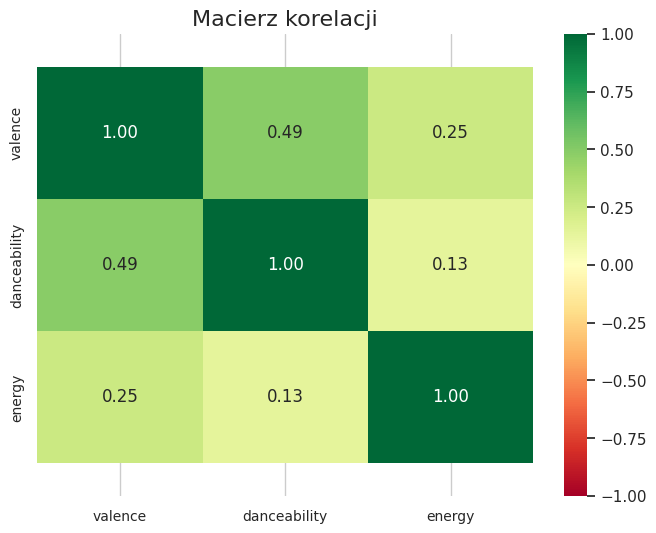

In [ ]:
numerical_data = data[['valence', 'danceability', 'energy']]

plt.figure(figsize=(8, 6))
ax = sns.heatmap(numerical_data.corr(),
                 annot=True,
                 fmt=".2f",
                 cmap='RdYlGn',
                 vmin=-1, vmax=1,
                 center=0)

plt.title('Macierz korelacji', fontsize=16)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.25, top - 0.25)

plt.show()

Zastosowanie logiki rozmytej

In [ ]:
# Tworzenie zmiennych lingwistycznych
energy = ctrl.Antecedent(np.arange(0, 1.1, 0.1), 'Energetyczność')
valence = ctrl.Antecedent(np.arange(0, 1.1, 0.1), 'Ładunek emocjonalny')
danceability = ctrl.Antecedent(np.arange(0, 1.1, 0.1), 'Taneczność')

mood = ctrl.Consequent(np.arange(0, 11, 1), 'Nastrój utworu')

In [ ]:
# Definiowanie zbiorów rozmytych i funkcji przynależności
energy['niska'] = fuzz.trapmf(energy.universe, [0, 0, 0.3, 0.5])
energy['średnia'] = fuzz.trapmf(energy.universe, [0.3, 0.5, 0.7, 0.9])
energy['wysoka'] = fuzz.trapmf(energy.universe, [0.7, 0.9, 1, 1])

In [ ]:
# Definiowanie zbiorów rozmytych i funkcji przynależności
valence['negatywny'] = fuzz.trapmf(valence.universe, [0, 0, 0.1, 0.4])
valence['nienakreślony'] = fuzz.trapmf(valence.universe, [0.1, 0.4, 0.7, 0.9])
valence['pozytywny'] = fuzz.trapmf(valence.universe, [0.7, 0.9, 1, 1])

In [ ]:
# Definiowanie zbiorów rozmytych i funkcji przynależności
danceability['nietaneczny'] = fuzz.trapmf(danceability.universe, [0, 0, 0.2, 0.4])
danceability['średnio taneczny'] = fuzz.trapmf(danceability.universe, [0.2, 0.4, 0.6, 0.8])
danceability['taneczny'] = fuzz.trapmf(danceability.universe, [0.6, 0.8, 1, 1])

In [ ]:
# Funkcje przynależności dla zmiennej wyjściowej - Nastrój utworu
mood['smutny'] = fuzz.trapmf(mood.universe, [0, 0, 2, 4])
mood['neutralny'] = fuzz.trapmf(mood.universe, [2, 4, 6, 8])
mood['radosny'] = fuzz.trapmf(mood.universe, [6, 8, 10, 10])

Nacechowanie energetyczne utworu:


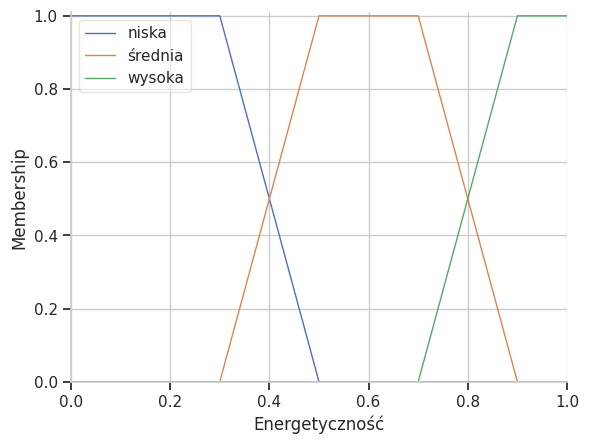

In [ ]:
print('Nacechowanie energetyczne utworu:')
energy.view()


Nacechowanie emocjonalne utworu:


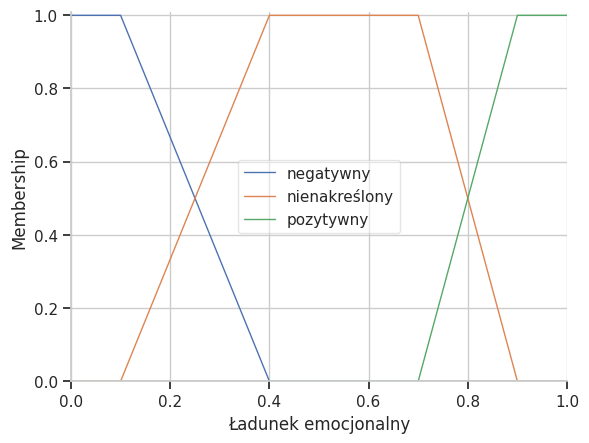

In [ ]:
print('\nNacechowanie emocjonalne utworu:')
valence.view()


Poziom taneczności utworu:


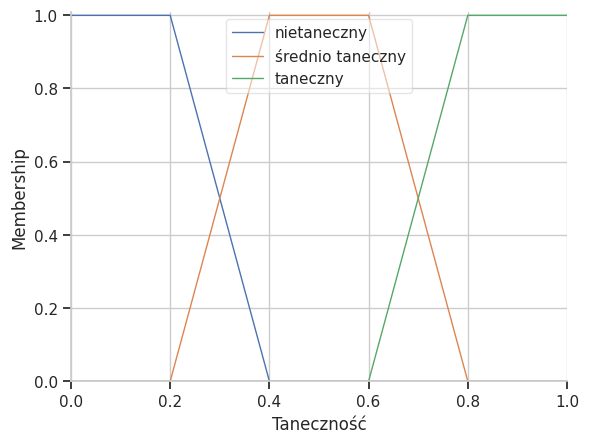

In [ ]:
print('\nPoziom taneczności utworu:')
danceability.view()


Nastrój utworu:


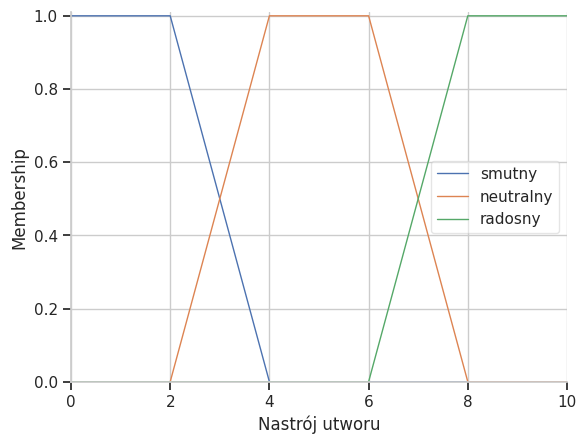

In [ ]:
print('\nNastrój utworu:')
mood.view()

In [ ]:
# Definiowanie reguł
rule1 = ctrl.Rule(energy['niska'] & valence['negatywny'] & danceability['nietaneczny'], mood['smutny'])
rule2 = ctrl.Rule(energy['niska'] & valence['negatywny'] & danceability['średnio taneczny'], mood['smutny'])
rule3 = ctrl.Rule(energy['niska'] & valence['negatywny'] & danceability['taneczny'], mood['smutny'])

rule4 = ctrl.Rule(energy['niska'] & valence['nienakreślony'] & danceability['nietaneczny'], mood['smutny'])
rule5 = ctrl.Rule(energy['niska'] & valence['nienakreślony'] & danceability['średnio taneczny'], mood['neutralny'])
rule6 = ctrl.Rule(energy['niska'] & valence['nienakreślony'] & danceability['taneczny'], mood['neutralny'])

rule7 = ctrl.Rule(energy['niska'] & valence['pozytywny'] & danceability['nietaneczny'], mood['neutralny'])
rule8 = ctrl.Rule(energy['niska'] & valence['pozytywny'] & danceability['średnio taneczny'], mood['neutralny'])
rule9 = ctrl.Rule(energy['niska'] & valence['pozytywny'] & danceability['taneczny'], mood['radosny'])

rule10 = ctrl.Rule(energy['średnia'] & valence['negatywny'] & danceability['nietaneczny'], mood['smutny'])
rule11 = ctrl.Rule(energy['średnia'] & valence['negatywny'] & danceability['średnio taneczny'], mood['neutralny'])
rule12 = ctrl.Rule(energy['średnia'] & valence['negatywny'] & danceability['taneczny'], mood['neutralny'])

rule13 = ctrl.Rule(energy['średnia'] & valence['nienakreślony'] & danceability['nietaneczny'], mood['neutralny'])
rule14 = ctrl.Rule(energy['średnia'] & valence['nienakreślony'] & danceability['średnio taneczny'], mood['neutralny'])
rule15 = ctrl.Rule(energy['średnia'] & valence['nienakreślony'] & danceability['taneczny'], mood['radosny'])

rule16 = ctrl.Rule(energy['średnia'] & valence['pozytywny'] & danceability['nietaneczny'], mood['neutralny'])
rule17 = ctrl.Rule(energy['średnia'] & valence['pozytywny'] & danceability['średnio taneczny'], mood['radosny'])
rule18 = ctrl.Rule(energy['średnia'] & valence['pozytywny'] & danceability['taneczny'], mood['radosny'])

rule19 = ctrl.Rule(energy['wysoka'] & valence['negatywny'] & danceability['nietaneczny'], mood['neutralny'])
rule20 = ctrl.Rule(energy['wysoka'] & valence['negatywny'] & danceability['średnio taneczny'], mood['neutralny'])
rule21 = ctrl.Rule(energy['wysoka'] & valence['negatywny'] & danceability['taneczny'], mood['neutralny'])

rule22 = ctrl.Rule(energy['wysoka'] & valence['nienakreślony'] & danceability['nietaneczny'], mood['neutralny'])
rule23 = ctrl.Rule(energy['wysoka'] & valence['nienakreślony'] & danceability['średnio taneczny'], mood['neutralny'])
rule24 = ctrl.Rule(energy['wysoka'] & valence['nienakreślony'] & danceability['taneczny'], mood['radosny'])

rule25 = ctrl.Rule(energy['wysoka'] & valence['pozytywny'] & danceability['nietaneczny'], mood['radosny'])
rule26 = ctrl.Rule(energy['wysoka'] & valence['pozytywny'] & danceability['średnio taneczny'], mood['radosny'])
rule27 = ctrl.Rule(energy['wysoka'] & valence['pozytywny'] & danceability['taneczny'], mood['radosny'])

In [ ]:
# Tworzenie systemu sterowania
mood_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9, rule10, rule11, rule12, rule13, rule14, rule15, rule16, rule17,
                                rule18, rule19, rule20, rule21, rule22, rule23, rule24, rule25, rule26, rule27]) # tworzy system
mood_ctrl_simulation = ctrl.ControlSystemSimulation(mood_ctrl) # umożliwia symulację

In [ ]:
def plot_surface_3d(selected_track, energy, valence, mood_ctrl_simulation):

    energy_value = selected_track['energy']
    valence_value = selected_track['valence']
    dance_value = selected_track['danceability']

    x = np.linspace(0, 1, 100)
    y = np.linspace(0, 1, 100)
    X, Y = np.meshgrid(x, y)

    Z = np.zeros_like(X)
    for i in range(X.shape[0]):
        for j in range(X.shape[1]):

            mood_ctrl_simulation.input['Energetyczność'] = X[i, j]
            mood_ctrl_simulation.input['Ładunek emocjonalny'] = Y[i, j]
            mood_ctrl_simulation.input['Taneczność'] = dance_value
            mood_ctrl_simulation.compute()

            Z[i, j] = mood_ctrl_simulation.output['Nastrój utworu']


    fig = plt.figure(figsize=(12, 8))
    ax = fig.add_subplot(111, projection='3d')

    surf = ax.plot_surface(X, Y, Z, cmap='viridis', edgecolor='k')

    ax.set_xlabel('Energetyczność utworu')
    ax.set_ylabel('Ładunek emocjonalny utworu')
    ax.set_zlabel('Nastrój utworu')
    ax.set_title(f"Wykres powierzchniowy: {selected_track['track_name']} - {selected_track['artists']}")

    fig.colorbar(surf, ax=ax, shrink=0.5, aspect=5)

    plt.show()

In [ ]:
filter_input = widgets.Text(
    placeholder="Wpisz nazwę utworu lub artysty...",
    description="Filtr:",
    layout=widgets.Layout(width="400px")
)

track_list = widgets.SelectMultiple(
    options=[(f"{row['track_name']} - {row['artists']}", (row['track_name'], row['artists'])) for _, row in data.iterrows()],
    description='Utwory:',
    rows=10,
    layout=widgets.Layout(width="600px", height="300px")
)

track_info_output = Output()
plot_output = Output()

def filter_tracks(change):
    filter_text = filter_input.value.lower()
    filtered_data = data[
        data['track_name'].str.contains(filter_text, case=False, na=False) |
        data['artists'].str.contains(filter_text, case=False, na=False)
    ]
    track_list.options = [(f"{row['track_name']} - {row['artists']}", (row['track_name'], row['artists'])) for _, row in filtered_data.iterrows()]

filter_input.observe(filter_tracks, names='value')

def on_track_selected(change):
    track_info_output.clear_output()
    plot_output.clear_output()

    selected_items = track_list.value
    if selected_items:
        selected_track_name, selected_artist = selected_items[0]
        selected_track = data[
            (data['track_name'] == selected_track_name) & (data['artists'] == selected_artist)
        ].iloc[0]

        input_value_energy = selected_track['energy']
        input_value_valence = selected_track['valence']
        input_value_danceability = selected_track['danceability']

        energy_low_membership = fuzz.interp_membership(energy.universe, energy['niska'].mf, input_value_energy)
        energy_medium_membership = fuzz.interp_membership(energy.universe, energy['średnia'].mf, input_value_energy)
        energy_high_membership = fuzz.interp_membership(energy.universe, energy['wysoka'].mf, input_value_energy)

        valence_negative_membership = fuzz.interp_membership(valence.universe, valence['negatywny'].mf, input_value_valence)
        valence_neutral_membership = fuzz.interp_membership(valence.universe, valence['nienakreślony'].mf, input_value_valence)
        valence_positive_membership = fuzz.interp_membership(valence.universe, valence['pozytywny'].mf, input_value_valence)

        danceability_non_danceable_membership = fuzz.interp_membership(danceability.universe, danceability['nietaneczny'].mf, input_value_danceability)
        danceability_medium_danceable_membership = fuzz.interp_membership(danceability.universe, danceability['średnio taneczny'].mf, input_value_danceability)
        danceability_danceable_membership = fuzz.interp_membership(danceability.universe, danceability['taneczny'].mf, input_value_danceability)

        mood_ctrl_simulation.input['Taneczność'] = selected_track['danceability']
        mood_ctrl_simulation.input['Energetyczność'] = selected_track['energy']
        mood_ctrl_simulation.input['Ładunek emocjonalny'] = selected_track['valence']

        mood_ctrl_simulation.compute()
        mood_value = mood_ctrl_simulation.output['Nastrój utworu']

      # Określenie kategorii nastroju
        if mood_value < 2.0:
            mood_category = 'Depresyjny'
        elif mood_value < 4.5:
            mood_category = 'Smutny'
        elif mood_value < 5.5:
            mood_category = 'Nieokreślony'
        elif mood_value < 8.0:
            mood_category = 'Wesoły'
        else:
            mood_category = 'Euforyczny'

        sad_membership = fuzz.interp_membership(mood.universe, mood['smutny'].mf, mood_value)
        neutral_membership = fuzz.interp_membership(mood.universe, mood['neutralny'].mf, mood_value)
        happy_membership = fuzz.interp_membership(mood.universe, mood['radosny'].mf, mood_value)

        with track_info_output:
            print(f"\nWybrano: {selected_track['track_name']} - {selected_track['artists']}")
            print(f"Energetyczność utworu: {selected_track['energy']}")
            print(f"  - niska:    {energy_low_membership}")
            print(f"  - średnia:  {energy_medium_membership}")
            print(f"  - wysoka:   {energy_high_membership}")

            print(f"Ładunek emocjonalny utworu: {selected_track['valence']}")
            print(f"  - negatywny:      {valence_negative_membership}")
            print(f"  - nienakreślony:  {valence_neutral_membership}")
            print(f"  - pozytywny:      {valence_positive_membership}")

            print(f"Taneczność utworu: {selected_track['danceability']}")
            print(f"  - nietaneczny:       {danceability_non_danceable_membership}")
            print(f"  - średnio taneczny:  {danceability_medium_danceable_membership}")
            print(f"  - taneczny:          {danceability_danceable_membership}")

            print(f"Nastrój utworu: {mood_value} - {mood_category}")
            print(f"  - smutny:     {sad_membership}")
            print(f"  - neutralny:  {neutral_membership}")
            print(f"  - radosny:    {happy_membership}")

        # Wykresy
        with plot_output:
            print("\nRozkład energii utworu:")
            energy.view(sim=mood_ctrl_simulation)
            plt.show()

            print("\nRozkład ładunku emocjonalnego utworu:")
            valence.view(sim=mood_ctrl_simulation)
            plt.show()

            print("\nRozkład taneczności utworu:")
            danceability.view(sim=mood_ctrl_simulation)
            plt.show()

            print("\nRozkład nastroju utowru:")
            mood.view(sim=mood_ctrl_simulation)
            plt.show()

      # Wykres powierzchniowy
            plot_surface_3d(selected_track, energy, valence, mood_ctrl_simulation)

track_list.observe(on_track_selected, names='value')
display(widgets.VBox([filter_input, track_list, track_info_output, plot_output]))